# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number and ID(s)***

---

Name: Adham hesham

ID: 52-20555

Tutorial: 9

---

Name: Aly Elghoul

ID: 52-2708

Tutorial: 9

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 160.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/music_genres.csv')
df.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

Data Inspection

In [3]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [4]:
# Missing values
missing_values_count_per_column = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values_count_per_column)

Missing Values per Column:
mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64


In [5]:
df.describe()

mode  acousticness  danceability   duration_ms       energy  \
count  2973.000000   2973.000000   2973.000000  2.973000e+03  2973.000000   
mean      0.833165      0.401241      0.537187  2.517209e+05     0.561143   
std       0.372891      0.319760      0.150668  9.465686e+04     0.234486   
min       0.000000      0.000003      0.056900  3.094600e+04     0.001002   
25%       1.000000      0.119050      0.441202  2.063788e+05     0.395058   
50%       1.000000      0.321745      0.546496  2.375453e+05     0.601195   
75%       1.000000      0.673991      0.647500  2.772720e+05     0.730127   
max       1.000000      0.996000      0.929000  2.382587e+06     0.994667   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       2973.000000  2973.000000  2973.000000  2973.000000  2973.000000   
mean           0.211366     0.192800   -10.509848     0.083588   119.018723   
std            0.267329     0.092356     5.369202     0.080483    17.469188   
min            0.000000     0.022200   -41.825000     0.023800    47.135722   
25%            0.004835     0.137687   -12.427656     0.044900   109.198143   
50%            0.080700     0.178764    -9.221817     0.059457   119.194167   
75%            0.343333     0.220856    -6.920125     0.091000   127.508750   
max            0.992000     0.960000     0.060000     0.946219   204.212000   

           valence   popularity          key  
count  2973.000000  2973.000000  2973.000000  
mean      0.492748    39.919185     5.938782  
std       0.201820    16.748723     3.368110  
min       0.003353     0.000000     0.000000  
25%       0.348578    32.491279     3.000000  
50%       0.500048    43.056569     7.000000  
75%       0.640257    51.138889     9.000000  
max       0.980000    80.666667    11.000000

Data Cleaning

In [6]:
#Removing Null value from genres
df = df[df['genres'].apply(lambda x: x != "[]" if pd.notna(x) else True)]
df.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   
5     1                abstract      0.459210      0.516167  3.431965e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   
5  0.442417          0.849667  0.118067 -15.472083     0.046517  127.885750   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
4  0.448249   45.820071    7  
5  0.307325   43.500000    1

In [7]:
unique_genres = df['genres'].unique()

# Create a DataFrame for better tabular display
unique_genres_df = pd.DataFrame({'Unique Genres': unique_genres})

# Print the DataFrame
print(unique_genres_df)

               Unique Genres
0     21st century classical
1                      432hz
2                      8-bit
3                 a cappella
4                   abstract
...                      ...
2967                    zolo
2968                 zouglou
2969                    zouk
2970            zurich indie
2971                  zydeco

[2972 rows x 1 columns]


Q1) What are the 5 most popular music genres?

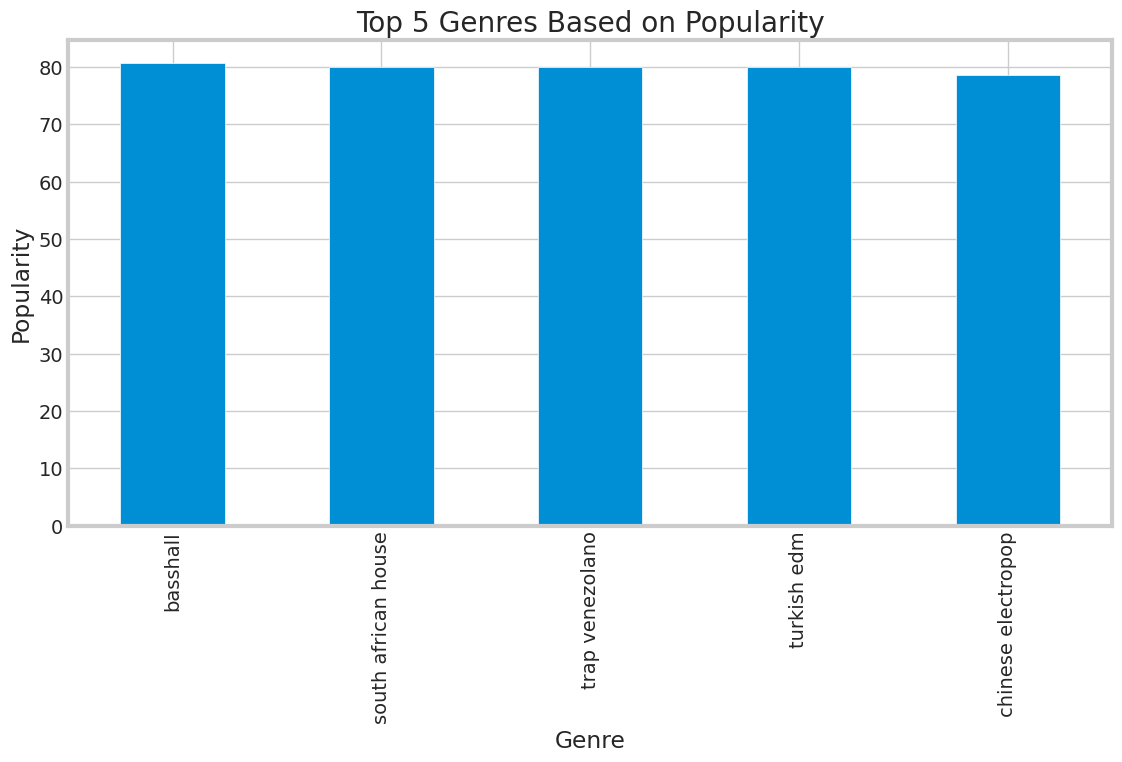

In [8]:
selected_columns = ['genres', ' acousticness', ' danceability',
                     'energy', ' duration_ms', ' instrumentalness',
                     'valence', ' popularity', ' tempo',
                     'liveness', ' loudness', 'speechiness',
                     'year', ' key']

# Extracting the top 5 genres based on popularity
df_filtered = df
top_genres = df_filtered.sort_values(by='popularity', ascending=False).head(5)

# Visualizing
fig, ax = plt.subplots(figsize=(12, 6))
top_genres.plot.bar(x='genres', y='popularity', ax=ax, legend=False)
plt.title('Top 5 Genres Based on Popularity')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

Q2) What factors affect the Popularity of the song?

<ipython-input-9-700cce7fbff8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


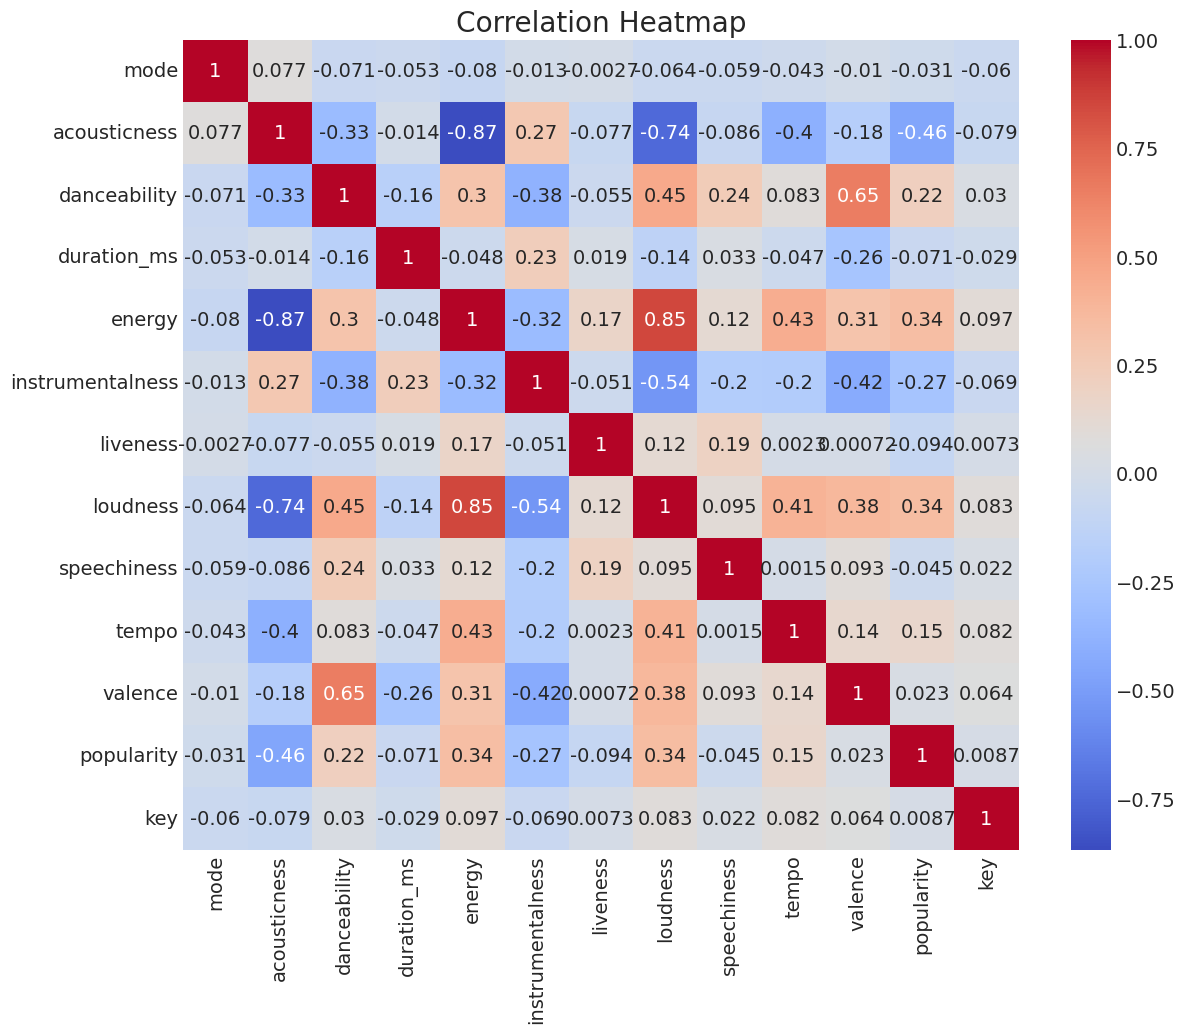

In [9]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Q3) Which genre has the highest energy and which has the lowest?

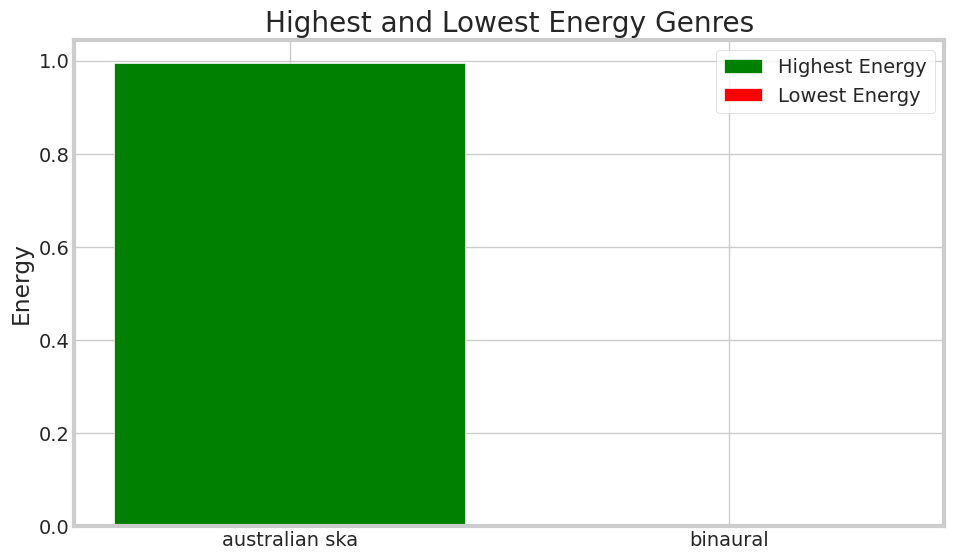

In [10]:
numerical_columns = [
    'acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness',
    'valence', 'popularity', 'tempo', 'liveness', 'loudness', 'speechiness']

# Find the genre with the highest energy
highest_energy_genre = df_filtered.loc[df_filtered['energy'].idxmax(), 'genres']

# Find the genre with the lowest energy
lowest_energy_genre = df_filtered.loc[df_filtered['energy'].idxmin(), 'genres']

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(highest_energy_genre, df_filtered.loc[df_filtered['genres'] == highest_energy_genre, 'energy'].values[0], color='green', label='Highest Energy')

ax.bar(lowest_energy_genre, df_filtered.loc[df_filtered['genres'] == lowest_energy_genre, 'energy'].values[0], color='red', label='Lowest Energy')

ax.set_ylabel('Energy')
ax.set_title('Highest and Lowest Energy Genres')
ax.legend()

plt.show()

Q4 ) What are the most correlated pairs of attributes?

<ipython-input-11-700cce7fbff8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


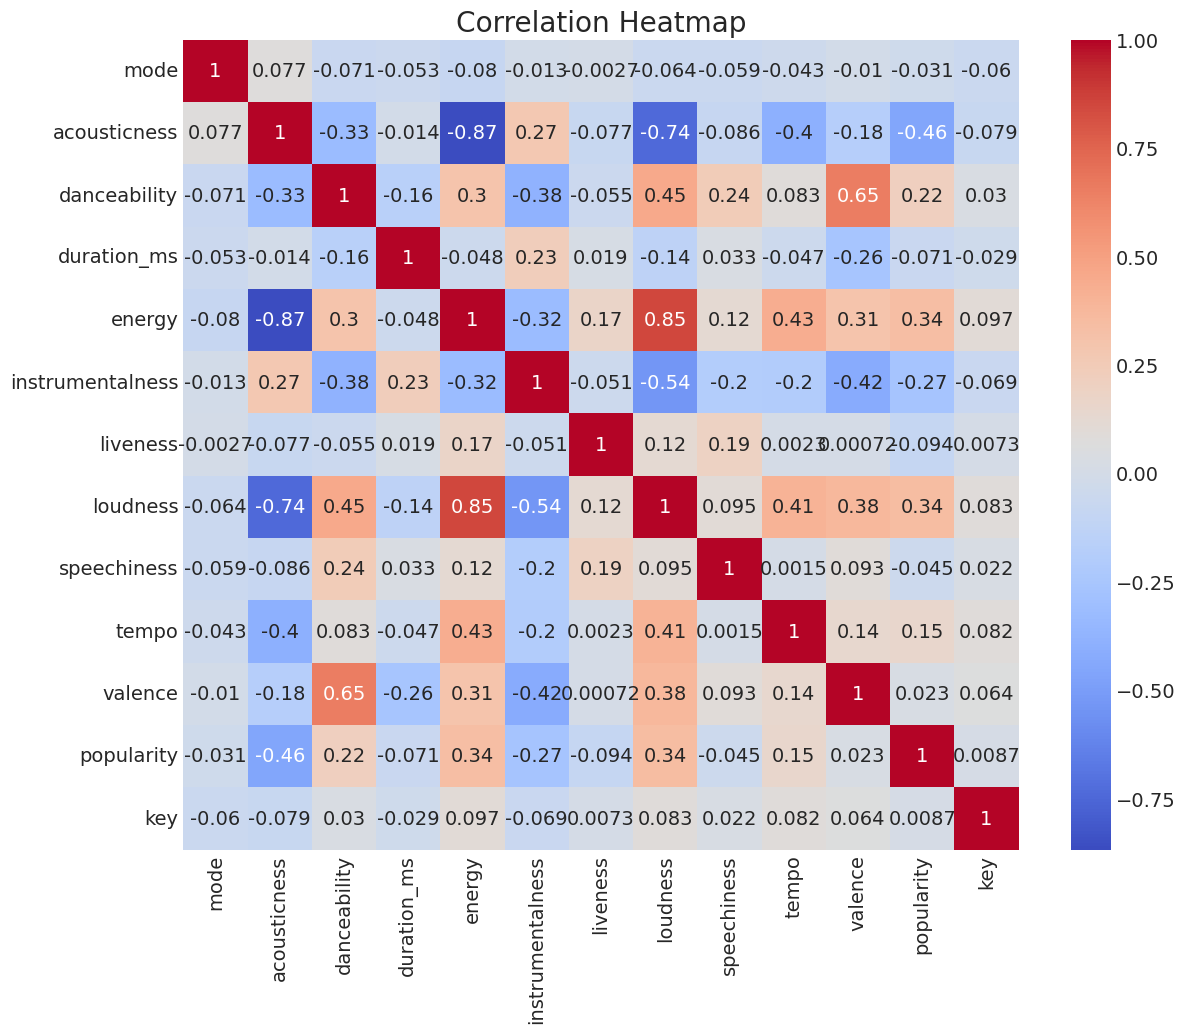

In [11]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Most Correlated pairs : ('energy', 'loudness') with correlation 0.85

Second Most Correlated pairs: ('danceability', 'valence') with correlation 0.65

K clustering

In [12]:
df_cluster = df[['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence', 'popularity', 'tempo', 'liveness', 'loudness', 'speechiness']].copy()
df_cluster.head()


acousticness  danceability    energy   duration_ms  instrumentalness  \
0      0.979333      0.162883  0.071317  1.602977e+05          0.606834   
1      0.494780      0.299333  0.450678  1.048887e+06          0.477762   
2      0.762000      0.712000  0.818000  1.151770e+05          0.876000   
4      0.676557      0.538961  0.316434  1.906285e+05          0.003003   
5      0.459210      0.516167  0.442417  3.431965e+05          0.849667   

    valence  popularity       tempo  liveness   loudness  speechiness  
0  0.103783   27.833333   75.336500  0.361600 -31.514333     0.040567  
1  0.221750   52.500000  120.285667  0.131000 -16.854000     0.076817  
2  0.975000   48.000000  133.444000  0.126000  -9.180000     0.047000  
4  0.448249   45.820071  112.110362  0.172254 -12.479387     0.082851  
5  0.307325   43.500000  127.885750  0.118067 -15.472083     0.046517

In [13]:
#normalization
df_cluster = (df_cluster - df_cluster.min()) / (df_cluster.max() - df_cluster.min())
df_cluster.head()

acousticness  danceability    energy  duration_ms  instrumentalness  \
0      0.983266      0.121527  0.070763     0.055005          0.611727   
1      0.496766      0.277988  0.452544     0.432864          0.481615   
2      0.765060      0.751175  0.822207     0.035818          0.883065   
4      0.679274      0.552759  0.317443     0.067903          0.003028   
5      0.461053      0.526622  0.444229     0.132780          0.856519   

    valence  popularity     tempo  liveness  loudness  speechiness  
0  0.102832    0.345041  0.179536  0.361911  0.246166     0.018177  
1  0.223620    0.650826  0.465697  0.116016  0.596180     0.057476  
2  0.994880    0.595041  0.549467  0.110685  0.779396     0.025151  
4  0.455534    0.568017  0.413650  0.160007  0.700623     0.064018  
5  0.311241    0.539256  0.514082  0.102225  0.629173     0.024627

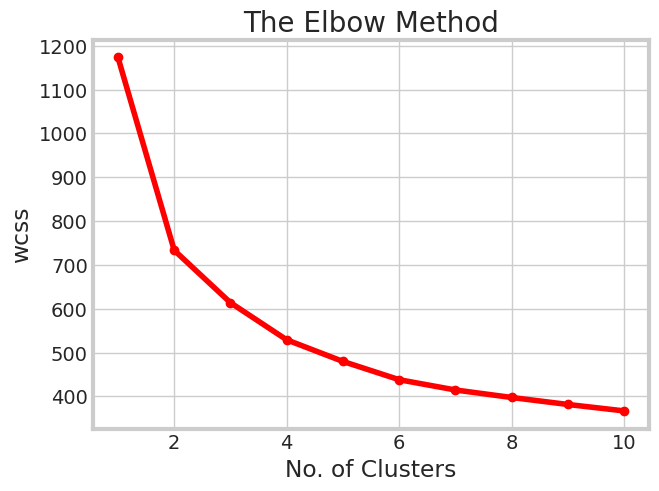

In [14]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_cluster)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(df_cluster)

# Get the cluster labels for the fitted data
labels = km.labels_
labels
# Set print options
np.set_printoptions(threshold=np.inf)

# Now when you print labels, it should print the full array
print(labels)

[3 3 1 1 3 2 2 1 1 0 2 0 3 1 2 2 1 2 2 1 1 2 1 0 2 2 3 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 3 0 1 2 0 0 3 2 1 3 3 3
 3 3 1 0 3 1 3 0 3 3 0 1 2 3 1 2 2 2 0 2 2 2 2 1 2 1 1 1 1 1 1 3 3 2 2 2 2
 2 2 2 2 2 2 1 2 0 3 2 2 2 3 2 1 2 3 2 2 2 2 0 2 3 0 2 0 2 0 2 1 2 2 2 2 1
 2 3 1 3 3 3 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 2 2 3 3 3 0 3 2 1
 0 3 1 0 2 1 2 2 2 2 3 3 1 1 1 2 1 1 1 0 1 3 3 3 3 2 0 2 2 2 3 1 1 1 1 3 2
 1 1 1 3 3 3 3 2 3 3 1 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 0 0 0 3 3
 2 0 2 0 0 3 0 2 0 1 0 1 1 2 2 0 3 1 2 3 1 0 2 3 3 2 2 0 0 0 1 0 2 0 0 0 0
 1 1 1 1 2 2 2 2 1 1 1 2 1 2 2 1 1 1 2 2 2 0 0 2 2 2 1 1 2 2 3 3 3 1 3 3 2
 3 3 3 2 0 2 1 1 0 1 1 2 2 2 2 2 0 0 0 1 3 2 1 2 0 0 2 2 0 2 2 3 3 2 3 1 0
 0 1 0 2 0 2 0 3 3 0 2 1 2 3 2 1 2 2 2 2 0 0 2 0 2 2 2 2 2 0 3 1 1 1 0 1 1
 2 2 3 1 2 3 1 2 1 2 2 2 1 3 3 3 1 2 1 2 0 2 3 1 0 2 2 2 1 1 2 2 0 0 2 2 2
 2 3 2 2 2 1 1 3 1 2 2 1 0 1 1 1 1 1 2 1 1 2 1 1 1 2 3 3 3 2 2 3 1 3 2 2 2
 1 3 1 3 3 1 3 1 0 2 2 1 

Cluster Interpretation

In [16]:
# We'll assign the cluster labels to a new column called 'cluster' in our original dataframe
df['cluster'] = labels

# You can avoid pandas' output truncation by setting the four options below.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

mode                                              acousticness                      \
          count      mean       std  min  25%  50%  75%  max        count      mean       std   
cluster                                                                                         
0         515.0  0.776699  0.416863  0.0  1.0  1.0  1.0  1.0        515.0  0.101097  0.121767   
1         721.0  0.866852  0.339971  0.0  1.0  1.0  1.0  1.0        721.0  0.705695  0.156266   
2        1334.0  0.826837  0.378530  0.0  1.0  1.0  1.0  1.0       1334.0  0.215322  0.142333   
3         402.0  0.865672  0.341430  0.0  1.0  1.0  1.0  1.0        402.0  0.856037  0.150817   

                                                        danceability                      \
              min       25%       50%       75%     max        count      mean       std   
cluster                                                                                    
0        0.000003  0.004550  0.050924  0.159873  0.5380        515.0  0.481011  0.156959   
1        0.277575  0.578500  0.695798  0.829000  0.9944        721.0  0.541169  0.100660   
2        0.000070  0.100026  0.198686  0.319616  0.6810       1334.0  0.615503  0.113371   
3        0.080664  0.788329  0.914935  0.964897  0.9960        402.0  0.342149  0.114578   

                                                        duration_ms                                \
              min       25%       50%       75%     max       count           mean            std   
cluster                                                                                             
0        0.144081  0.376000  0.460515  0.590769  0.9020       515.0  282496.105417   77590.471380   
1        0.146000  0.487171  0.543470  0.599090  0.9030       721.0  232074.723421  114373.747815   
2        0.262000  0.534983  0.618520  0.702414  0.9290      1334.0  239542.775256   47056.900296   
3        0.056900  0.274363  0.331335  0.406225  0.7645       402.0  287989.521796  155298.051270   

                                                                             energy            \
             min            25%            50%            75%           max   count      mean   
cluster                                                                                         
0        91233.0  236985.704009  273431.528704  316608.306344  7.163470e+05   515.0  0.768068   
1        42813.0  183635.449561  213526.981360  252093.260358  1.622000e+06   721.0  0.395985   
2        30946.0  211415.875000  234494.540232  260581.375000  5.629600e+05  1334.0  0.680559   
3        72187.0  205775.653738  263891.097991  344689.175074  2.382587e+06   402.0  0.196348   

                                                                    instrumentalness            \
              std       min       25%       50%       75%       max            count      mean   
cluster                                                                                          
0        0.151714  0.251000  0.666042  0.792000  0.897167  0.994667            515.0  0.409478   
1        0.134568  0.022400  0.308932  0.396325  0.474812  0.900000            721.0  0.134010   
2        0.116847  0.319000  0.602613  0.676623  0.757630  0.991000           1334.0  0.051724   
3        0.123194  0.001002  0.112811  0.178416  0.246750  0.980833            402.0  0.626081   

                                                                    liveness                      \
              std       min       25%       50%       75%       max    count      mean       std   
cluster                                                                                            
0        0.259339  0.000000  0.199653  0.387606  0.596920  0.932000    515.0  0.207835  0.101149   
1        0.167331  0.000000  0.000879  0.045173  0.234682  0.876000    721.0  0.203135  0.102618   
2        0.074767  0.000000  0.000524  0.017589  0.074288  0.414422   1334.0  0.190467  0.078430   
3        0.

In [17]:
df.groupby('cluster').describe(include='object')

genres                                    
         count unique                     top freq
cluster                                           
0          515    515              acid house    1
1          721    721                   8-bit    1
2         1334   1334          abstract beats    1
3          402    402  21st century classical    1

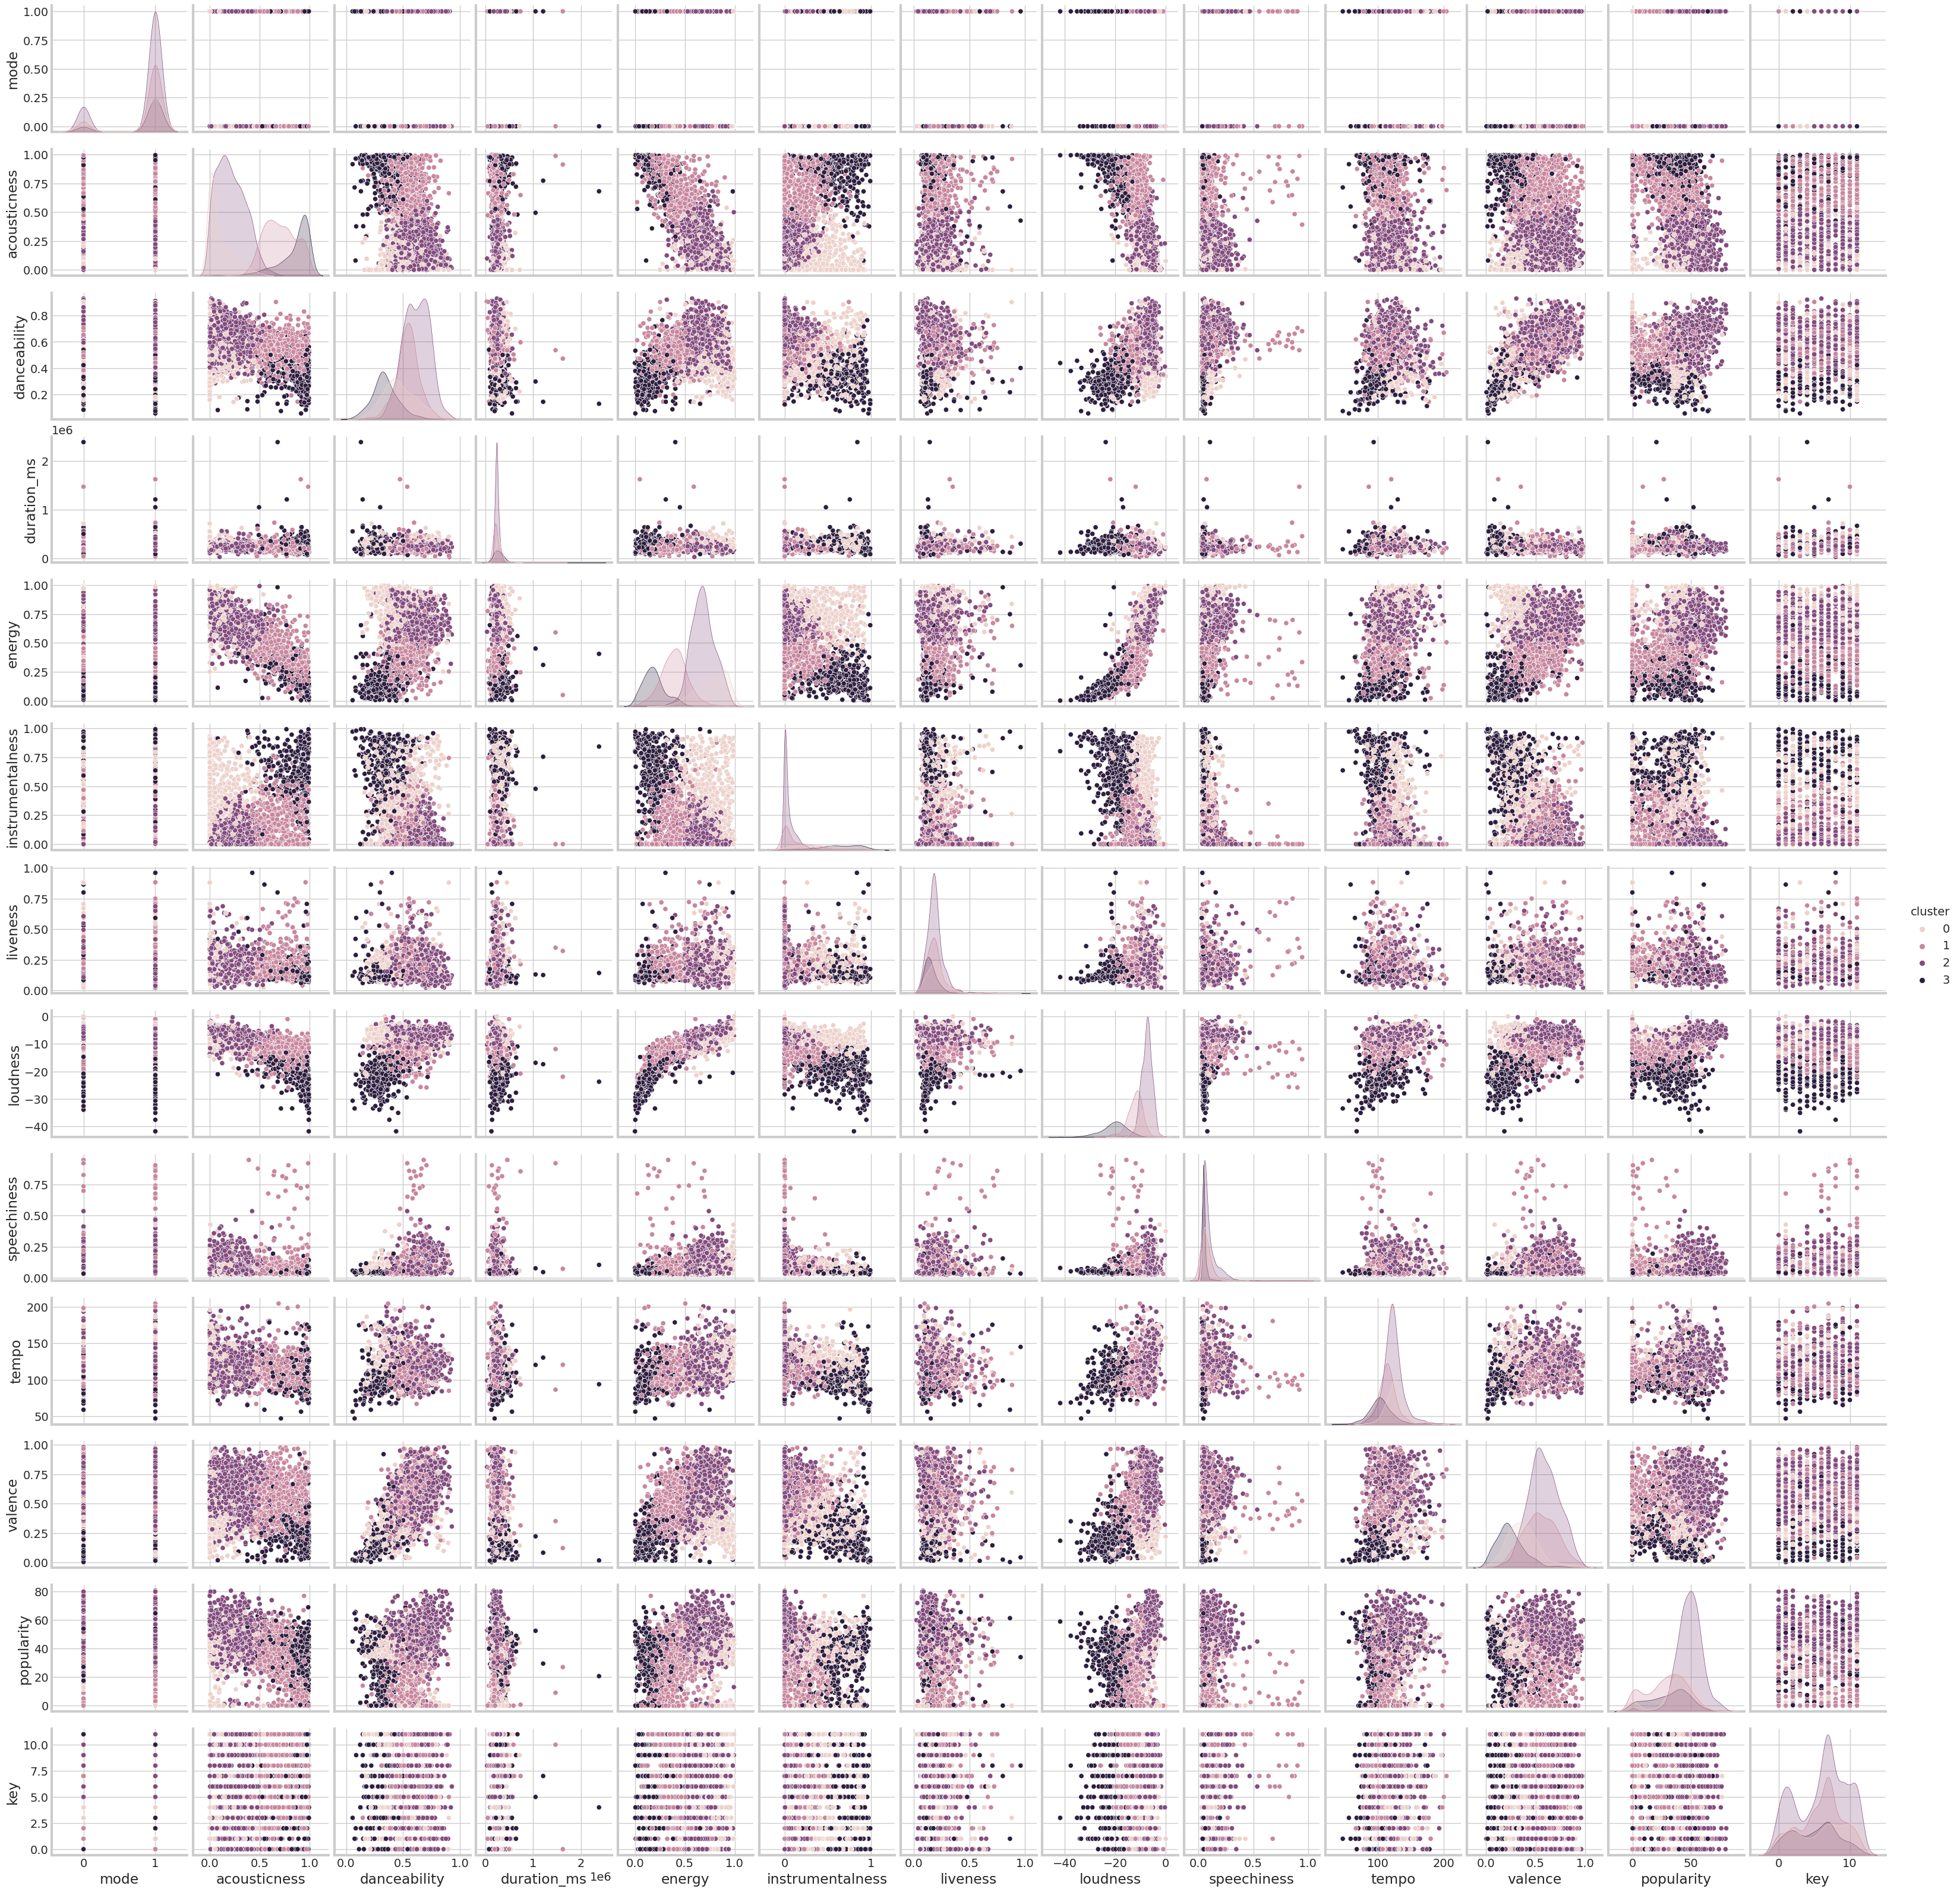

In [18]:
# Pairplot
sns.pairplot(df, hue='cluster')
plt.show()
